In [ ]:
"""
This is a NEURAL NETWORK CLASSIFIER module.
   
To use this module - 
   >> import neuralNetwork as nn

1. Create an object
   >> stat = knn.det( matrix of (m examples X n features ),matrix of (m output examples X 1, number of classes) )
   Output labels can be any number or strings.
 
2. Provide essential data
   >> stat.parameter( 'list' of number of units in required number of hidden layers , number of unit in output layer )

3. Plot graph to ensure the optimization of cost function to guess alpha and number of iterations.
   >> stat.plotJvsno(alpha, number of iterations,regularisation parameter(default=0), batch size (default=batch GradDescent))

3. Obtain Theta - a list containing appropriate theta1, theta2, and so on
   >> Theta = stat.gettheta(alpha, number of iterations,regularisation parameter(default=0), batch size (default=batch GradDescent))

4. To obtain output -
   >> y_predict = stat.predict( feature test matrix )

5. Accuracy  can be determined by -
   >> accuracy = stat.accuracy(X_test,y_test)


"""


In [2]:
import numpy as np
import neuralNetwork as nn
import pandas as pd

In [3]:
def shuffle(a, b):
  assert len(a) == len(b)
  p = np.random.permutation(len(a))
  return a[p], b[p]

In [4]:
# loading data

data = pd.read_csv('data/Moon.txt',header=None,sep=',')
data = np.array(data.values)
X = data[:,0:2]
y = data[:,2:3]
X,y = shuffle(X,y)

In [5]:
# separating in train and test set

m = np.shape(X)[0]
X_train = X[0:int(0.7*m),:]
y_train = y[0:int(0.7*m)]
X_test = X[int(0.7*m):,:]
y_test = y[int(0.7*m):]

In [6]:
# creating object. Parameter takes - (list of number of units in hidden layer,number of unit in output layer)

stat = nn.optimize(X_train,y_train)
stat.parameter([25,25],2)

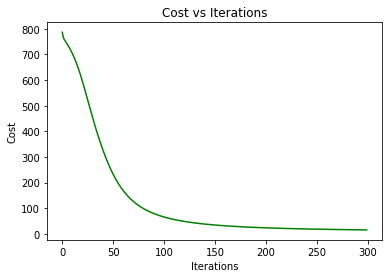

In [7]:
# plot graph to ensure minimization of cost function to guess value of alpha and other parameters

stat.plotJvsno(0.4,300,1)

In [8]:
# gettheta will return Theta, array  with theta1 as Theta[1], and so on so on..
# gettheta takes - (alpha, number of iterations,regularisation parameter(default=0), batch size (default=batch GradDescent))

Theta = stat.gettheta(0.04,300,1)

In [9]:
# predicting

y_predict = stat.predict(X_test)

In [10]:
#accuracy

print stat.accuracy(X_test,y_test),'%'

97 %


In [11]:
# comparing accuracy with scikit

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1)
clf.fit(X_train,y_train.ravel())
y_predict = clf.predict(X_test)
y_predict = np.reshape(y_predict,(np.shape(y_predict)[0],1))
y = y_predict
k = (y==y_test)
k = k.astype(int)

print np.sum(k)*100/np.shape(y_test)[0],'%'


100 %
